In [1]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant #회귀분석 상수항 추가
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor #예측/회귀
from sklearn.linear_model import LinearRegression #분산 팽창계수 계산할때 사용
from sklearn.feature_selection import RFE #후진제거법(변수선택)
from sklearn.preprocessing import StandardScaler #표준화 회귀계수 산출(scale 변환)
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공산성 확인
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import graphviz # 나무구조 시각화
from sklearn.tree import export_graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime

#로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# scaling
from sklearn.preprocessing import StandardScaler
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
path ='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
#한글과 음수표시
matplotlib.rc('font',family=fontprop)
matplotlib.rc('axes',unicode_minus=False)

In [2]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    
def trend_chart(data):
    plt.scatter(df_raw['datetime'], df_raw[data],alpha = 0.1)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.axhline(y=df_raw[data].mean(), linestyle="-", label='CL')
    plt.axhline(y=df_raw[data].mean()+3*np.std(df_raw[data]), linestyle='--', color='red', label='UCL')
    plt.axhline(y=df_raw[data].mean()-3*np.std(df_raw[data]), linestyle='--', color='red', label='LCL')
    plt.axhline(y=tag_list1[tag_list1['id'] == data].set_index("id").to_dict()['기준최소값'][data], linestyle='-', color='pink', label='USL')
    plt.axhline(y=tag_list2[tag_list2['id'] == data].set_index("id").to_dict()['기준최대값'][data], linestyle='-', color='pink', label='LSL')
    plt.legend()
    
def trend2_chart(data):
    plt.scatter(nomal['datetime'], nomal[data])
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.axhline(y=nomal[data].mean(), linestyle="-", label='CL')
    plt.axhline(y=nomal[data].mean()+3*np.std(nomal[data]), linestyle='--', color='red', label='UCL')
    plt.axhline(y=nomal[data].mean()-3*np.std(nomal[data]), linestyle='--', color='red', label='LCL')
    plt.axhline(y=tag_list1[tag_list1['id'] == data].set_index("id").to_dict()['기준최소값'][data], linestyle='-', color='pink', label='USL')
    plt.axhline(y=tag_list2[tag_list2['id'] == data].set_index("id").to_dict()['기준최대값'][data], linestyle='-', color='pink', label='LSL')
    plt.legend()

#  태그리스트

In [3]:
# 데이터 구성하기
tag_list = pd.read_csv("/home/piai/바탕화면/B4_제지/02_태그리스트.csv",sep=';', encoding='euc-kr')
tag_list.head()

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
0,TAG_001,Vacuum,1,Approach,증해 및 표백 파트,1ST NASH P/P CURRENT,Current,Measurement,12.0,18.0
1,TAG_002,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CONS,Consistency,Measurement,3.5,4.2
2,TAG_003,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CIC V/V,Consistency,Output,30.0,50.0
3,TAG_004,Mixing Flow,1,Approach,증해 및 표백 파트,MACHINE CHEST TO STOCK BOX 농도,Consistency,Measurement,3.5,4.2
4,TAG_005,Mixing Flow,1,Approach,증해 및 표백 파트,pm21 PCC FLOW,Flow,Measurement,0.0,320.0


In [4]:
tag_list1 = tag_list[['id','기준최소값']]
tag_list2 = tag_list[['id','기준최대값']]
tag_list2[tag_list2['id'] == 'TAG_004'].set_index("id").to_dict()['기준최대값']['TAG_004']

4.2

In [5]:
tag_list2

,id,기준최대값
0,TAG_001,18.0
1,TAG_002,4.2
2,TAG_003,50.0
3,TAG_004,4.2
4,TAG_005,320.0
...,...,...
191,TAG_192,0.1
192,TAG_193,100.0
193,TAG_194,0.0
194,TAG_195,0.0


In [6]:
tag_list2[tag_list2['id'] == 'TAG_004'].set_index("id").to_dict()['기준최대값']['TAG_004']

4.2

In [7]:
tag_list2

,id,기준최대값
0,TAG_001,18.0
1,TAG_002,4.2
2,TAG_003,50.0
3,TAG_004,4.2
4,TAG_005,320.0
...,...,...
191,TAG_192,0.1
192,TAG_193,100.0
193,TAG_194,0.0
194,TAG_195,0.0


# 종이 데이터에서 중지리스트와 운영데이터 조인하기 - 시작

In [8]:
# 2개의 테이블에서 날짜 조건문 처리

stop_list = pd.read_csv('/home/piai/바탕화면/B4_제지/03_중지리스트.csv')
stop_list = stop_list.drop('Unnamed: 0', axis = 1)

stop_list['start_date'] = pd.to_datetime(stop_list['start_date'])
stop_list['end_date']   = pd.to_datetime(stop_list['end_date'])
stop_list.head()

,facility,cause,start_date,end_date
0,ALL,공정청소,2021-01-01 09:17:00,2021-01-01 10:17:00
1,ALL,계획보수,2021-01-03 08:21:00,2021-01-03 16:00:00
2,ALL,계획보수,2021-01-03 16:00:00,2021-01-03 20:25:00
3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00
4,ALL,지종교체,2021-01-06 17:59:00,2021-01-06 18:16:00


## 1) 데이터 불러오기 

In [9]:
sample = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_1.csv')
sample

,id,datetime,value
0,TAG_001,2020-12-31T15:00:00Z,14.998843
1,TAG_001,2020-12-31T15:01:00Z,14.998953
2,TAG_001,2020-12-31T15:02:00Z,14.999063
3,TAG_001,2020-12-31T15:03:00Z,14.999173
4,TAG_001,2020-12-31T15:04:00Z,14.999284
...,...,...,...
4582828,TAG_010,2021-12-31T14:55:00Z,0.000000
4582829,TAG_010,2021-12-31T14:56:00Z,0.000000
4582830,TAG_010,2021-12-31T14:57:00Z,0.000000
4582831,TAG_010,2021-12-31T14:58:00Z,0.000000


In [10]:
sample.query("id=='TAG_006'")

,id,datetime,value
2534914,TAG_006,2020-12-31T15:00:00Z,0.0
2534915,TAG_006,2020-12-31T15:01:00Z,0.0
2534916,TAG_006,2020-12-31T15:02:00Z,0.0
2534917,TAG_006,2020-12-31T15:03:00Z,0.0
2534918,TAG_006,2020-12-31T15:04:00Z,0.0
...,...,...,...
3027675,TAG_006,2021-12-31T14:55:00Z,0.0
3027676,TAG_006,2021-12-31T14:56:00Z,0.0
3027677,TAG_006,2021-12-31T14:57:00Z,0.0
3027678,TAG_006,2021-12-31T14:58:00Z,0.0


In [11]:
df_raw_1 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_1.csv')
df_raw_1['datetime'] = pd.to_datetime(df_raw_1.datetime).dt.tz_localize(None)
df_raw_1 = pd.pivot_table(df_raw_1, index ='datetime', columns = 'id', values ='value')
df_raw_1.head()

id,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,TAG_010
datetime,,,,,,,,,,
2020-12-31 15:00:00,14.998843,3.627277,0.0,3.638380,150.183147,0.0,0.0,0.0,NaN,0.0
2020-12-31 15:01:00,14.998953,3.629643,0.0,3.638348,150.200404,0.0,0.0,0.0,NaN,0.0
2020-12-31 15:02:00,14.999063,3.632929,0.0,3.638315,150.217660,0.0,0.0,0.0,NaN,0.0
2020-12-31 15:03:00,14.999173,3.607274,0.0,3.638283,150.234917,0.0,0.0,0.0,NaN,0.0
2020-12-31 15:04:00,14.999284,3.651782,0.0,3.638250,150.252173,0.0,0.0,0.0,NaN,0.0


In [12]:
df_raw_2 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_2.csv')
df_raw_2['datetime'] = pd.to_datetime(df_raw_2.datetime).dt.tz_localize(None)
df_raw_2 = pd.pivot_table(df_raw_2, index ='datetime', columns = 'id', values ='value')
df_raw_2.head()

id,TAG_011,TAG_012,TAG_013,TAG_014,TAG_015,TAG_016,TAG_017,TAG_018,TAG_019,TAG_020
datetime,,,,,,,,,,
2020-12-31 15:00:00,100.0,91.560300,49.366380,58.922830,0.115838,0.107781,20.740878,9854.036589,830276.438542,15.0
2020-12-31 15:01:00,100.0,91.561358,49.366883,58.923143,0.115836,0.107780,20.741124,9929.930990,830277.641667,15.0
2020-12-31 15:02:00,100.0,91.562416,49.367387,58.923456,0.115835,0.107779,20.741370,10061.797591,830278.844792,15.0
2020-12-31 15:03:00,100.0,91.563475,49.367891,58.923769,0.115833,0.107779,20.741616,10082.294466,830280.048958,15.0
2020-12-31 15:04:00,100.0,91.564533,49.368395,58.924082,0.115832,0.107778,20.741862,9933.832487,830281.252083,15.0


In [13]:
df_raw_3 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_3.csv')
df_raw_3['datetime'] = pd.to_datetime(df_raw_3.datetime).dt.tz_localize(None)
df_raw_3 = pd.pivot_table(df_raw_3, index ='datetime', columns = 'id', values ='value')
df_raw_3.head()

id,TAG_021,TAG_022,TAG_023,TAG_024,TAG_025,TAG_026,TAG_027,TAG_028,TAG_029,TAG_030
datetime,,,,,,,,,,
2020-12-31 15:00:00,70.0,100.0,70.0,100.0,NaN,55.0,85.0,75.0,84.999771,65.0
2020-12-31 15:01:00,70.0,100.0,70.0,100.0,NaN,55.0,85.0,75.0,84.999771,65.0
2020-12-31 15:02:00,70.0,100.0,70.0,100.0,NaN,55.0,85.0,75.0,84.999771,65.0
2020-12-31 15:03:00,70.0,100.0,70.0,100.0,NaN,55.0,85.0,75.0,84.999771,65.0
2020-12-31 15:04:00,70.0,100.0,70.0,100.0,NaN,55.0,85.0,75.0,84.999771,65.0


In [14]:
df_raw_4 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_4.csv')
df_raw_4['datetime'] = pd.to_datetime(df_raw_4.datetime).dt.tz_localize(None)
df_raw_4 = pd.pivot_table(df_raw_4, index ='datetime', columns = 'id', values ='value')
df_raw_4.head()

id,TAG_031,TAG_032,TAG_033,TAG_034,TAG_035,TAG_036,TAG_037,TAG_038,TAG_039,TAG_040
datetime,,,,,,,,,,
2020-12-31 15:00:00,84.490812,75.204795,94.839750,85.334540,94.839750,0.0,0.010532,0.315071,1.248740,1.247990
2020-12-31 15:01:00,84.454158,75.205250,94.840239,84.690552,94.840239,0.0,0.010525,0.315067,1.248738,1.248006
2020-12-31 15:02:00,84.417505,75.205701,94.840728,84.648927,94.840728,0.0,0.010517,0.315063,1.248735,1.248022
2020-12-31 15:03:00,84.380851,75.206156,94.841218,84.719999,94.841218,0.0,0.010509,0.315059,1.248733,1.248038
2020-12-31 15:04:00,84.344198,75.206608,94.841707,84.791071,94.841707,0.0,0.010502,0.315055,1.248731,1.248054


In [15]:
df_raw_5 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_5.csv')
df_raw_5['datetime'] = pd.to_datetime(df_raw_5.datetime).dt.tz_localize(None)
df_raw_5 = pd.pivot_table(df_raw_5, index ='datetime', columns = 'id', values ='value')
df_raw_5.head()

id,TAG_041,TAG_042,TAG_043,TAG_044,TAG_045,TAG_046,TAG_047,TAG_048,TAG_049,TAG_050
datetime,,,,,,,,,,
2020-12-31 15:00:00,1.233501,1.117797,0.994842,1.265289,1.654151,53.274192,36.477896,641.261561,100.0,55.0
2020-12-31 15:01:00,1.233509,1.120597,0.994838,1.265332,1.654175,53.273283,36.476968,641.261271,100.0,55.0
2020-12-31 15:02:00,1.233518,1.174256,0.994833,1.265375,1.654199,53.272375,36.476040,641.260982,100.0,55.0
2020-12-31 15:03:00,1.233526,1.163144,0.994829,1.265417,1.654222,53.271467,36.475112,641.260691,100.0,55.0
2020-12-31 15:04:00,1.233535,1.151959,0.994825,1.265460,1.654246,53.270558,36.474184,641.260402,100.0,55.0


In [16]:
df_raw_6 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_6.csv')
df_raw_6['datetime'] = pd.to_datetime(df_raw_6.datetime).dt.tz_localize(None)
df_raw_6 = pd.pivot_table(df_raw_6, index ='datetime', columns = 'id', values ='value')
df_raw_6.head()

id,TAG_051,TAG_052,TAG_053,TAG_054,TAG_055,TAG_056,TAG_057,TAG_058,TAG_059,TAG_060
datetime,,,,,,,,,,
2020-12-31 15:00:00,0.0,80.000229,100.0,75.208656,55.0,1.487962,100.0,100.0,77.139133,946.529428
2020-12-31 15:01:00,0.0,80.000229,100.0,75.206624,55.0,1.487993,100.0,100.0,77.134793,946.527708
2020-12-31 15:02:00,0.0,80.000229,100.0,75.204591,55.0,1.488023,100.0,100.0,77.130454,946.525989
2020-12-31 15:03:00,0.0,80.000229,100.0,75.202558,55.0,1.488053,100.0,100.0,77.126114,946.524271
2020-12-31 15:04:00,0.0,80.000229,100.0,75.200525,55.0,1.488084,100.0,100.0,77.121774,946.522551


In [17]:
df_raw_7 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_7.csv')
df_raw_7['datetime'] = pd.to_datetime(df_raw_7.datetime).dt.tz_localize(None)
df_raw_7 = pd.pivot_table(df_raw_7, index ='datetime', columns = 'id', values ='value')
df_raw_7.head()

id,TAG_061,TAG_062,TAG_063,TAG_064,TAG_065,TAG_066,TAG_067,TAG_068,TAG_069,TAG_070
datetime,,,,,,,,,,
2020-12-31 15:00:00,0.0,32.693359,6.369098,6.692575,42.172198,122.531632,101.050688,110.019324,121.770413,124.481252
2020-12-31 15:01:00,0.0,32.693359,6.438839,6.676173,42.171238,122.494135,100.994773,109.518989,122.893007,124.878627
2020-12-31 15:02:00,0.0,32.693359,6.368744,6.725077,42.170276,122.456638,102.818660,110.926405,123.401393,124.065438
2020-12-31 15:03:00,0.0,32.693359,6.395991,6.653384,42.169315,122.419141,102.913266,110.944579,123.166132,123.699624
2020-12-31 15:04:00,0.0,32.693359,6.344462,6.776975,42.168354,122.381644,102.588004,110.623713,122.930872,123.346440


In [18]:
df_raw_8 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_8.csv')
df_raw_8['datetime'] = pd.to_datetime(df_raw_8.datetime).dt.tz_localize(None)
df_raw_8 = pd.pivot_table(df_raw_8, index ='datetime', columns = 'id', values ='value')
df_raw_8.head()

id,TAG_071,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078,TAG_079,TAG_080
datetime,,,,,,,,,,
2020-12-31 15:00:00,8.295514,89.132423,86.986683,8.405273,98.691004,99.600536,14.268866,50.718800,140.110726,99.934535
2020-12-31 15:01:00,8.295505,89.132423,86.986591,8.405273,98.690911,99.600524,14.268853,50.719444,140.130732,99.934730
2020-12-31 15:02:00,8.295496,89.132423,86.986498,8.405273,98.690818,99.600513,14.268839,50.720088,140.150737,99.934925
2020-12-31 15:03:00,8.295487,89.132423,86.986405,8.405273,98.690726,99.600501,14.268826,50.720733,140.170742,99.935120
2020-12-31 15:04:00,8.295477,89.132423,86.986312,8.405273,98.690633,99.600490,14.268812,50.721377,140.190747,99.935315


In [19]:
df_raw_9 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_9.csv')
df_raw_9['datetime'] = pd.to_datetime(df_raw_9.datetime).dt.tz_localize(None)
df_raw_9 = pd.pivot_table(df_raw_9, index ='datetime', columns = 'id', values ='value')
df_raw_9.head()

id,TAG_081,TAG_082,TAG_083,TAG_084,TAG_085,TAG_086,TAG_087,TAG_088,TAG_089,TAG_090
datetime,,,,,,,,,,
2020-12-31 15:00:00,0.0,0.0,72.0,0.312228,524.028287,11.447276,800.609829,799.214147,36.469945,2.831699
2020-12-31 15:01:00,0.0,0.0,72.0,0.312294,524.572665,11.447281,800.362569,800.127892,35.831943,2.855000
2020-12-31 15:02:00,0.0,0.0,72.0,0.312360,524.673589,11.447286,800.857728,800.157711,35.243130,2.878302
2020-12-31 15:03:00,0.0,0.0,72.0,0.312425,524.277858,11.447291,799.485946,799.369316,35.296289,2.901604
2020-12-31 15:04:00,0.0,0.0,72.0,0.312491,523.882126,11.447297,797.116443,799.816764,35.670856,2.924905


In [20]:
df_raw_10 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_10.csv')
df_raw_10['datetime'] = pd.to_datetime(df_raw_10.datetime).dt.tz_localize(None)
df_raw_10 = pd.pivot_table(df_raw_10, index ='datetime', columns = 'id', values ='value')
df_raw_10.head()

id,TAG_091,TAG_092,TAG_093,TAG_094,TAG_095,TAG_096,TAG_097,TAG_098,TAG_099,TAG_100
datetime,,,,,,,,,,
2020-12-31 15:00:00,413815.582813,176060.544792,0.0,62.0,35.0,65.0,65.0,65.0,-1.226562,52.402973
2020-12-31 15:01:00,413816.179167,176060.592188,0.0,62.0,35.0,65.0,65.0,65.0,-1.226562,51.724553
2020-12-31 15:02:00,413816.775521,176060.639583,0.0,62.0,35.0,65.0,65.0,65.0,-1.226562,51.046132
2020-12-31 15:03:00,413817.371875,176060.686719,0.0,62.0,35.0,65.0,65.0,65.0,-1.226562,50.367712
2020-12-31 15:04:00,413817.968750,176060.734115,0.0,62.0,35.0,65.0,65.0,65.0,-1.226562,49.689291


In [21]:
df_raw_11 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_11.csv')
df_raw_11['datetime'] = pd.to_datetime(df_raw_11.datetime).dt.tz_localize(None)
df_raw_11 = pd.pivot_table(df_raw_11, index ='datetime', columns = 'id', values ='value')
df_raw_11.head()

id,TAG_101,TAG_102,TAG_103,TAG_104,TAG_105,TAG_106,TAG_107,TAG_108,TAG_109,TAG_110
datetime,,,,,,,,,,
2020-12-31 15:00:00,39.530111,4.026709,42.168021,0.520298,0.865321,4.736777,-0.508154,0.946349,0.805781,0.712838
2020-12-31 15:01:00,39.670194,4.027142,41.913050,0.520305,0.865341,4.736705,-0.508176,0.946319,0.805732,0.712872
2020-12-31 15:02:00,40.066732,4.027576,41.658080,0.520312,0.865362,4.736633,-0.508198,0.946289,0.805684,0.712907
2020-12-31 15:03:00,42.203327,4.028010,41.403110,0.520318,0.865382,4.736561,-0.508220,0.946258,0.805636,0.712941
2020-12-31 15:04:00,44.666257,4.028443,41.148140,0.520325,0.865402,4.736489,-0.508242,0.946228,0.805587,0.712975


In [22]:
df_raw_12 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_12.csv')
df_raw_12['datetime'] = pd.to_datetime(df_raw_12.datetime).dt.tz_localize(None)
df_raw_12 = pd.pivot_table(df_raw_12, index ='datetime', columns = 'id', values ='value')
df_raw_12.head()

id,TAG_111,TAG_112,TAG_113,TAG_114,TAG_115,TAG_116,TAG_117,TAG_118,TAG_119,TAG_120
datetime,,,,,,,,,,
2020-12-31 15:00:00,0.593286,0.395539,-0.381656,0.175580,57.242606,163.866943,38.601288,47.938260,4.206491,1055.276642
2020-12-31 15:01:00,0.593367,0.395323,-0.381706,0.175580,57.245164,163.867006,38.591671,47.937953,4.206284,1055.178776
2020-12-31 15:02:00,0.593447,0.395106,-0.381756,0.175580,57.247722,163.867068,38.582056,47.937647,4.206077,1055.080908
2020-12-31 15:03:00,0.593528,0.394890,-0.381807,0.175580,57.250280,163.867131,38.572441,47.937339,4.205869,1054.983038
2020-12-31 15:04:00,0.593608,0.394674,-0.381857,0.175581,57.252838,163.867193,38.562824,47.937033,4.205662,1054.885173


In [23]:
df_raw_13 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_13.csv')
df_raw_13['datetime'] = pd.to_datetime(df_raw_13.datetime).dt.tz_localize(None)
df_raw_13 = pd.pivot_table(df_raw_13, index ='datetime', columns = 'id', values ='value')
df_raw_13.head()

id,TAG_121,TAG_122,TAG_123,TAG_124,TAG_125,TAG_126,TAG_127,TAG_128,TAG_129,TAG_130
datetime,,,,,,,,,,
2020-12-31 15:00:00,926017.400000,0.0,0.0,0.0,30.0,20.0,10.792633,24.964792,35.122951,16.052046
2020-12-31 15:01:00,926019.160417,0.0,0.0,0.0,30.0,20.0,10.605198,25.816389,35.187872,16.609845
2020-12-31 15:02:00,926020.918750,0.0,0.0,0.0,30.0,20.0,10.417764,25.995315,35.252794,17.167644
2020-12-31 15:03:00,926022.677083,0.0,0.0,0.0,30.0,20.0,10.230329,25.762990,35.317715,17.725442
2020-12-31 15:04:00,926024.435417,0.0,0.0,0.0,30.0,20.0,10.042895,26.124632,35.382636,18.283241


In [24]:
df_raw_14 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_14.csv')
df_raw_14['datetime'] = pd.to_datetime(df_raw_14.datetime).dt.tz_localize(None)
df_raw_14 = pd.pivot_table(df_raw_14, index ='datetime', columns = 'id', values ='value')
df_raw_14.head()

id,TAG_131,TAG_132,TAG_133,TAG_134,TAG_135,TAG_136,TAG_137,TAG_138,TAG_139,TAG_140
datetime,,,,,,,,,,
2020-12-31 15:00:00,48.472201,75.212158,92.024681,99.617538,0.040330,0.128750,6.058102,1.388101,7.232440,0.176188
2020-12-31 15:01:00,48.559868,75.212099,93.275718,99.623146,0.040319,0.128753,6.057573,1.387891,7.232632,0.176082
2020-12-31 15:02:00,48.647536,75.213880,94.617706,99.628756,0.040308,0.128757,6.057044,1.387682,7.232824,0.175976
2020-12-31 15:03:00,48.735203,75.215662,95.161529,99.634364,0.040296,0.128760,6.056514,1.387473,7.233015,0.175870
2020-12-31 15:04:00,48.822871,75.217444,95.548137,99.639973,0.040285,0.128764,6.055985,1.387263,7.233207,0.175764


In [25]:
df_raw_15 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_15.csv')
df_raw_15['datetime'] = pd.to_datetime(df_raw_15.datetime).dt.tz_localize(None)
df_raw_15 = pd.pivot_table(df_raw_15, index ='datetime', columns = 'id', values ='value')
df_raw_15.head()

id,TAG_141,TAG_142,TAG_143,TAG_144,TAG_145,TAG_146,TAG_147,TAG_148,TAG_149,TAG_150
datetime,,,,,,,,,,
2020-12-31 15:00:00,0.081427,0.044084,0.173678,0.040269,0.049304,0.251022,0.277878,0.115564,-0.828719,-0.734756
2020-12-31 15:01:00,0.081443,0.044063,0.173633,0.040271,0.049272,0.250800,0.277642,0.115502,-0.828767,-0.734733
2020-12-31 15:02:00,0.081459,0.044043,0.173588,0.040273,0.049241,0.250578,0.277405,0.115439,-0.828815,-0.734710
2020-12-31 15:03:00,0.081475,0.044022,0.173543,0.040275,0.049209,0.250356,0.277169,0.115376,-0.828863,-0.734687
2020-12-31 15:04:00,0.081491,0.044001,0.173498,0.040277,0.049178,0.250134,0.276932,0.115313,-0.828911,-0.734665


In [26]:
df_raw_16 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_16.csv')
df_raw_16['datetime'] = pd.to_datetime(df_raw_16.datetime).dt.tz_localize(None)
df_raw_16 = pd.pivot_table(df_raw_16, index ='datetime', columns = 'id', values ='value')
df_raw_16.head()

id,TAG_151,TAG_152,TAG_153,TAG_154,TAG_155,TAG_156,TAG_157,TAG_158,TAG_159,TAG_160
datetime,,,,,,,,,,
2020-12-31 15:00:00,-0.069318,5.465044,1.984739,5.472728,0.0,1625.172758,1628.638102,1598.615609,1654.753487,1190.601562
2020-12-31 15:01:00,-0.069305,5.465226,1.984753,5.473151,0.0,1628.385201,1628.896592,1599.303662,1654.753243,1190.601562
2020-12-31 15:02:00,-0.069292,5.465408,1.984766,5.473573,0.0,1624.765493,1628.129423,1598.475513,1654.752999,1190.601562
2020-12-31 15:03:00,-0.069279,5.465590,1.984779,5.473996,0.0,1624.988090,1627.685630,1598.377419,1654.752755,1190.601562
2020-12-31 15:04:00,-0.069267,5.465772,1.984792,5.474419,0.0,1625.384200,1630.202887,1598.280762,1654.752511,1190.601562


In [27]:
df_raw_17 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_17.csv')
df_raw_17['datetime'] = pd.to_datetime(df_raw_17.datetime).dt.tz_localize(None)
df_raw_17 = pd.pivot_table(df_raw_17, index ='datetime', columns = 'id', values ='value')
df_raw_17.head()

id,TAG_161,TAG_162,TAG_163,TAG_164,TAG_165,TAG_166,TAG_167,TAG_168,TAG_169,TAG_170
datetime,,,,,,,,,,
2020-12-31 15:00:00,26.692719,30.722001,74.671967,33.180016,58.744184,92.951698,86.816785,88.771147,89.866836,82.326100
2020-12-31 15:01:00,26.696957,30.722628,74.673845,33.181734,58.744704,92.951300,86.816196,88.770358,89.835003,82.168815
2020-12-31 15:02:00,26.701195,30.723255,74.675723,33.183451,58.745224,92.950902,86.815609,88.769569,89.803170,82.011530
2020-12-31 15:03:00,26.705434,30.723882,74.677601,33.185169,58.745743,92.950504,86.815020,88.768780,89.771337,81.854246
2020-12-31 15:04:00,26.709672,30.724509,74.679479,33.186887,58.746263,92.950106,86.814432,88.767990,89.739503,81.696961


In [28]:
df_raw_18 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_18.csv')
df_raw_18['datetime'] = pd.to_datetime(df_raw_18.datetime).dt.tz_localize(None)
df_raw_18 = pd.pivot_table(df_raw_18, index ='datetime', columns = 'id', values ='value')
df_raw_18.head()

id,TAG_171,TAG_172,TAG_173,TAG_174,TAG_175,TAG_176,TAG_177,TAG_178,TAG_179,TAG_180
datetime,,,,,,,,,,
2020-12-31 15:00:00,82.372262,81.366753,75.891950,82.841975,33.951505,669536.968750,28.491420,49.905054,0.312228,39.992975
2020-12-31 15:01:00,82.369427,81.367069,75.889841,82.841107,33.954619,669537.515625,28.491755,49.892504,0.312294,39.992605
2020-12-31 15:02:00,82.366592,81.367385,75.887732,82.840239,33.957734,669538.062500,28.492091,49.879954,0.312360,39.992236
2020-12-31 15:03:00,82.363758,81.367701,75.885624,82.839371,33.960848,669538.610417,28.492427,49.867404,0.312425,39.991866
2020-12-31 15:04:00,82.360923,81.368018,75.883515,82.838503,33.963962,669539.158333,28.492762,49.854855,0.312491,39.991496


In [29]:
df_raw_19 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_19.csv')
df_raw_19['datetime'] = pd.to_datetime(df_raw_19.datetime).dt.tz_localize(None)
df_raw_19 = pd.pivot_table(df_raw_19, index ='datetime', columns = 'id', values ='value')
df_raw_19.head()

id,TAG_181,TAG_182,TAG_183,TAG_184,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190
datetime,,,,,,,,,,
2020-12-31 15:00:00,40.529704,38.921267,39.670853,40.835461,40.445474,40.286198,39.838523,40.442122,0.099745,0.505503
2020-12-31 15:01:00,40.059433,40.215208,39.403944,40.519128,39.907138,40.272303,39.846898,40.621681,0.099763,0.505522
2020-12-31 15:02:00,39.588591,40.564035,39.137036,40.018820,39.346890,40.258407,39.855274,40.774376,0.099781,0.505541
2020-12-31 15:03:00,39.219700,39.949808,38.870127,39.593696,38.762017,40.244512,39.863649,40.744808,0.099799,0.505560
2020-12-31 15:04:00,39.544364,40.022265,38.603218,39.680040,39.265926,40.230616,39.872025,40.681057,0.099817,0.505579


In [30]:
df_raw_20 = pd.read_csv('/home/piai/바탕화면/B4_제지/01_tags2/tags_20.csv')
df_raw_20['datetime'] = pd.to_datetime(df_raw_20.datetime).dt.tz_localize(None)
df_raw_20 = pd.pivot_table(df_raw_20, index ='datetime', columns = 'id', values ='value')
df_raw_20.head()

id,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196
datetime,,,,,,
2020-12-31 15:00:00,0.032899,0.0,81.412858,NaN,51.836511,NaN
2020-12-31 15:01:00,0.032911,0.0,81.472849,NaN,51.838120,NaN
2020-12-31 15:02:00,0.032922,0.0,81.344790,NaN,51.839729,NaN
2020-12-31 15:03:00,0.032934,0.0,81.530460,NaN,51.841338,NaN
2020-12-31 15:04:00,0.032946,0.0,81.884934,NaN,51.842947,NaN


In [31]:
df_raw = pd.concat([df_raw_1, df_raw_2, df_raw_3, df_raw_4, df_raw_5,
                    df_raw_6, df_raw_7, df_raw_8, df_raw_9, df_raw_10,
                    df_raw_11, df_raw_12, df_raw_13, df_raw_14, df_raw_15,
                    df_raw_16, df_raw_17, df_raw_18, df_raw_19, df_raw_20], axis=1, join = 'outer')
df_raw.reset_index(inplace= True)
df_raw.count().head()

id
datetime    521356
TAG_001     492824
TAG_002     492527
TAG_003     521327
TAG_004     521327
dtype: int64

In [32]:
df_raw

id,datetime,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,...,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196
0,2020-12-31 15:00:00,14.998843,3.627277,0.0,3.638380,150.183147,0.0,0.000000,0.0,NaN,...,39.838523,40.442122,0.099745,0.505503,0.032899,0.000000,81.412858,NaN,51.836511,NaN
1,2020-12-31 15:01:00,14.998953,3.629643,0.0,3.638348,150.200404,0.0,0.000000,0.0,NaN,...,39.846898,40.621681,0.099763,0.505522,0.032911,0.000000,81.472849,NaN,51.838120,NaN
2,2020-12-31 15:02:00,14.999063,3.632929,0.0,3.638315,150.217660,0.0,0.000000,0.0,NaN,...,39.855274,40.774376,0.099781,0.505541,0.032922,0.000000,81.344790,NaN,51.839729,NaN
3,2020-12-31 15:03:00,14.999173,3.607274,0.0,3.638283,150.234917,0.0,0.000000,0.0,NaN,...,39.863649,40.744808,0.099799,0.505560,0.032934,0.000000,81.530460,NaN,51.841338,NaN
4,2020-12-31 15:04:00,14.999284,3.651782,0.0,3.638250,150.252173,0.0,0.000000,0.0,NaN,...,39.872025,40.681057,0.099817,0.505579,0.032946,0.000000,81.884934,NaN,51.842947,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521351,2021-12-31 14:55:00,14.391347,3.629825,0.0,3.626222,135.838685,0.0,0.086278,0.0,0.0,...,39.364815,39.912516,0.114904,0.189613,0.031485,0.121305,NaN,41.434067,38.325493,NaN
521352,2021-12-31 14:56:00,14.391303,3.629500,0.0,3.626215,135.852610,0.0,0.086709,0.0,0.0,...,39.372183,39.959582,0.115859,0.189603,0.031483,0.121313,NaN,41.435871,38.328272,NaN
521353,2021-12-31 14:57:00,14.391260,3.629176,0.0,3.626208,135.866536,0.0,0.087139,0.0,0.0,...,39.379555,40.006648,0.116815,0.189593,0.031481,0.121322,NaN,41.437675,38.331051,NaN
521354,2021-12-31 14:58:00,14.391216,3.628851,0.0,3.626202,135.880461,0.0,0.087569,0.0,0.0,...,39.386927,40.053714,0.117771,0.189583,0.031479,0.121331,NaN,41.439479,38.333829,NaN


## 2) 중지데이터 조인 시작

In [33]:
# 중지 데이터 정리 : 중지 시작 시간과 종료 시간의 인터벌 계산 

all_intervals = stop_list.assign(lag_date = stop_list['end_date'].shift(1))
all_intervals['datetime'] = np.where(all_intervals['start_date'] == all_intervals['lag_date'],
                                     all_intervals['start_date'] + pd.Timedelta(minutes=1),
                                     all_intervals['start_date'])
all_intervals['datetime'] = all_intervals['datetime'].fillna(all_intervals['start_date'])
all_intervals.drop(['start_date','lag_date'],axis=1,inplace=True)
all_intervals.rename(columns = {'datetime':'start_date'},inplace=True)
all_intervals = all_intervals[['facility','cause','start_date','end_date']]
all_intervals['intervals'] = [(x[1]['end_date'] - x[1]['start_date']).total_seconds() / 60
                              for x in all_intervals.iterrows()]
all_intervals

,facility,cause,start_date,end_date,intervals
0,ALL,공정청소,2021-01-01 09:17:00,2021-01-01 10:17:00,60.0
1,ALL,계획보수,2021-01-03 08:21:00,2021-01-03 16:00:00,459.0
2,ALL,계획보수,2021-01-03 16:01:00,2021-01-03 20:25:00,264.0
3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00,45.0
4,ALL,지종교체,2021-01-06 17:59:00,2021-01-06 18:16:00,17.0
...,...,...,...,...,...
506,2군 DRYER,불량중지,2021-12-28 14:16:00,2021-12-28 14:52:00,36.0
507,1군 DRYER,불량중지,2021-12-28 16:53:00,2021-12-28 17:35:00,42.0
508,ALL,공정청소,2021-12-30 00:00:00,2021-12-30 01:04:00,64.0
509,CALENDER,불량중지,2021-12-30 20:09:00,2021-12-30 20:23:00,14.0


In [34]:
# 연산을 위한 딕셔너리 작성

my_intervals = all_intervals.groupby('start_date').apply(lambda x : dict(x))
my_intervals

start_date
2021-01-01 09:17:00    {'facility': ['ALL'], 'cause': ['공정청소'], 'star...
2021-01-03 08:21:00    {'facility': ['ALL'], 'cause': ['계획보수'], 'star...
2021-01-03 16:01:00    {'facility': ['ALL'], 'cause': ['계획보수'], 'star...
2021-01-03 21:39:00    {'facility': ['3번 PRESS'], 'cause': ['불량중지'], ...
2021-01-06 17:59:00    {'facility': ['ALL'], 'cause': ['지종교체'], 'star...
                                             ...                        
2021-12-28 14:16:00    {'facility': ['2군 DRYER'], 'cause': ['불량중지'], ...
2021-12-28 16:53:00    {'facility': ['1군 DRYER'], 'cause': ['불량중지'], ...
2021-12-30 00:00:00    {'facility': ['ALL'], 'cause': ['공정청소'], 'star...
2021-12-30 20:09:00    {'facility': ['CALENDER'], 'cause': ['불량중지'], ...
2021-12-31 00:33:00    {'facility': ['ALL'], 'cause': ['공정청소'], 'star...
Length: 511, dtype: object

In [35]:
# 중지 시간 데이터 수 계산

my_intervals_cnt = pd.Series([range(0, int(x['intervals'].values[0] + 2)) for x in my_intervals])
my_intervals_cnt.index = my_intervals.index

my_intervals = pd.concat([my_intervals, my_intervals_cnt], axis = 1).reset_index()
my_intervals.columns = ['datetime','data','count']
my_intervals

# 데이터 수 확인

my_intervals["count"][0]
my_intervals["count"][1]

range(0, 461)

In [36]:
# 중지 시간데이터 변수화 및 확인
my_intervals['date'] = [pd.date_range(x[1]['datetime'], periods = max(x[1]['count']), freq = 'min')
                        for x in my_intervals.iterrows()]
my_intervals
my_intervals["date"][0]

DatetimeIndex(['2021-01-01 09:17:00', '2021-01-01 09:18:00',
               '2021-01-01 09:19:00', '2021-01-01 09:20:00',
               '2021-01-01 09:21:00', '2021-01-01 09:22:00',
               '2021-01-01 09:23:00', '2021-01-01 09:24:00',
               '2021-01-01 09:25:00', '2021-01-01 09:26:00',
               '2021-01-01 09:27:00', '2021-01-01 09:28:00',
               '2021-01-01 09:29:00', '2021-01-01 09:30:00',
               '2021-01-01 09:31:00', '2021-01-01 09:32:00',
               '2021-01-01 09:33:00', '2021-01-01 09:34:00',
               '2021-01-01 09:35:00', '2021-01-01 09:36:00',
               '2021-01-01 09:37:00', '2021-01-01 09:38:00',
               '2021-01-01 09:39:00', '2021-01-01 09:40:00',
               '2021-01-01 09:41:00', '2021-01-01 09:42:00',
               '2021-01-01 09:43:00', '2021-01-01 09:44:00',
               '2021-01-01 09:45:00', '2021-01-01 09:46:00',
               '2021-01-01 09:47:00', '2021-01-01 09:48:00',
               '2021-01-

In [37]:
# 중지 원인 별도 분리하여 변수화

my_intervals['cause'] = [x[2]['cause'].values[0] for x in my_intervals.itertuples()]
my_intervals

,datetime,data,count,date,cause
0,2021-01-01 09:17:00,"{'facility': ['ALL'], 'cause': ['공정청소'], 'star...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-01-01 09:17:00', '2021-01...",공정청소
1,2021-01-03 08:21:00,"{'facility': ['ALL'], 'cause': ['계획보수'], 'star...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-01-03 08:21:00', '2021-01...",계획보수
2,2021-01-03 16:01:00,"{'facility': ['ALL'], 'cause': ['계획보수'], 'star...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-01-03 16:01:00', '2021-01...",계획보수
3,2021-01-03 21:39:00,"{'facility': ['3번 PRESS'], 'cause': ['불량중지'], ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-01-03 21:39:00', '2021-01...",불량중지
4,2021-01-06 17:59:00,"{'facility': ['ALL'], 'cause': ['지종교체'], 'star...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-01-06 17:59:00', '2021-01...",지종교체
...,...,...,...,...,...
506,2021-12-28 14:16:00,"{'facility': ['2군 DRYER'], 'cause': ['불량중지'], ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-12-28 14:16:00', '2021-12...",불량중지
507,2021-12-28 16:53:00,"{'facility': ['1군 DRYER'], 'cause': ['불량중지'], ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-12-28 16:53:00', '2021-12...",불량중지
508,2021-12-30 00:00:00,"{'facility': ['ALL'], 'cause': ['공정청소'], 'star...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-12-30 00:00:00', '2021-12...",공정청소
509,2021-12-30 20:09:00,"{'facility': ['CALENDER'], 'cause': ['불량중지'], ...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","DatetimeIndex(['2021-12-30 20:09:00', '2021-12...",불량중지


In [38]:
# 데이터 정리

my_intervals = my_intervals[['date', 'cause']].explode('date')
my_intervals

stop_rate = my_intervals.groupby('cause').agg(['count'])
stop_rate.reset_index(inplace= True)
stop_rate

,cause,date
,,count
0,DOWN TIME,6620
1,REBUILD,6406
2,계획보수,14770
3,공전,2679
4,공정청소,5645
5,불량중지,5472
6,중지,1945
7,지종교체,381
8,한전PEAK절전,761


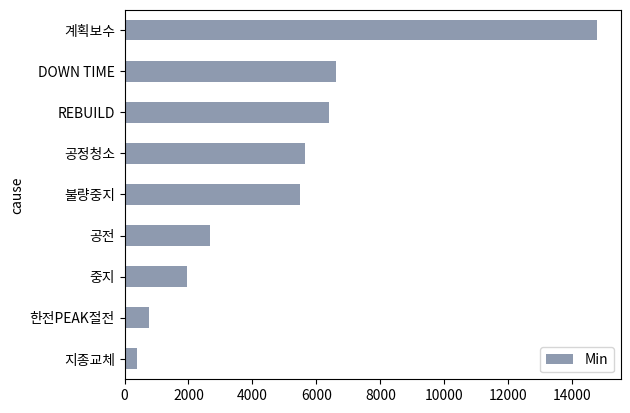

In [39]:
stop_rate = stop_rate.sort_values(by=[('date', 'count')], ascending=True) 
ax = stop_rate.plot.barh(x='cause', y=('date', 'count'), color='#8e9aaf', label='Min')

In [40]:
# 데이터 정리

my_intervals.reset_index(drop = True, inplace = True)
my_intervals

my_intervals.groupby('cause').agg(['count'])

,date
,count
cause,
DOWN TIME,6620
REBUILD,6406
계획보수,14770
공전,2679
공정청소,5645
불량중지,5472
중지,1945
지종교체,381


In [41]:
# 중지 데이터와 운영 데이터 결합으로 최종 데이터 생성
df_raw = pd.merge(df_raw, my_intervals, how = 'left', left_on = 'datetime', right_on = 'date')
df_raw['cause'] = df_raw['cause'].fillna('정상')
df_raw.drop(columns = ["date"], inplace = True)
df_raw

,datetime,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,...,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196,cause
0,2020-12-31 15:00:00,14.998843,3.627277,0.0,3.638380,150.183147,0.0,0.000000,0.0,NaN,...,40.442122,0.099745,0.505503,0.032899,0.000000,81.412858,NaN,51.836511,NaN,정상
1,2020-12-31 15:01:00,14.998953,3.629643,0.0,3.638348,150.200404,0.0,0.000000,0.0,NaN,...,40.621681,0.099763,0.505522,0.032911,0.000000,81.472849,NaN,51.838120,NaN,정상
2,2020-12-31 15:02:00,14.999063,3.632929,0.0,3.638315,150.217660,0.0,0.000000,0.0,NaN,...,40.774376,0.099781,0.505541,0.032922,0.000000,81.344790,NaN,51.839729,NaN,정상
3,2020-12-31 15:03:00,14.999173,3.607274,0.0,3.638283,150.234917,0.0,0.000000,0.0,NaN,...,40.744808,0.099799,0.505560,0.032934,0.000000,81.530460,NaN,51.841338,NaN,정상
4,2020-12-31 15:04:00,14.999284,3.651782,0.0,3.638250,150.252173,0.0,0.000000,0.0,NaN,...,40.681057,0.099817,0.505579,0.032946,0.000000,81.884934,NaN,51.842947,NaN,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521363,2021-12-31 14:55:00,14.391347,3.629825,0.0,3.626222,135.838685,0.0,0.086278,0.0,0.0,...,39.912516,0.114904,0.189613,0.031485,0.121305,NaN,41.434067,38.325493,NaN,정상
521364,2021-12-31 14:56:00,14.391303,3.629500,0.0,3.626215,135.852610,0.0,0.086709,0.0,0.0,...,39.959582,0.115859,0.189603,0.031483,0.121313,NaN,41.435871,38.328272,NaN,정상
521365,2021-12-31 14:57:00,14.391260,3.629176,0.0,3.626208,135.866536,0.0,0.087139,0.0,0.0,...,40.006648,0.116815,0.189593,0.031481,0.121322,NaN,41.437675,38.331051,NaN,정상
521366,2021-12-31 14:58:00,14.391216,3.628851,0.0,3.626202,135.880461,0.0,0.087569,0.0,0.0,...,40.053714,0.117771,0.189583,0.031479,0.121331,NaN,41.439479,38.333829,NaN,정상


# 데이터 조인하기 끝

# 이상치 처리

### 기준치 벗어나는 데이터 50% 이상인 태그 제거

In [ ]:
for i in range(1,197):
    if i<10:
        count = 0
        min = tag_list1.loc[i-1,'기준최소값']
        max = tag_list2.loc[i-1,'기준최대값']
        for j in df_raw['TAG_00{}'.format(i)]:
            if ((j<min) or (j>max)):
                count += 1
        if count>260678:
            print('TAG_00{}'.format(i), count)
        
    elif i>=10 and i<100:
        count = 0
        min = tag_list1.loc[i-1,'기준최소값']
        max = tag_list2.loc[i-1,'기준최대값']
        for j in df_raw['TAG_0{}'.format(i)]:
            if ((j<min) or (j>max)):
                count += 1
        if count>260678:
            print('TAG_0{}'.format(i), count)
            
    else:
        count = 0
        min = tag_list1.loc[i-1,'기준최소값']
        max = tag_list2.loc[i-1,'기준최대값']
        for j in df_raw['TAG_{}'.format(i)]:
            if ((j<min) or (j>max)):
                count += 1
        if count>260678:
            print('TAG_{}'.format(i), count)

In [ ]:
for i in range(1,197):
    if i<10:
        count = 0
        min = tag_list1.loc[i-1,'기준최소값']
        max = tag_list2.loc[i-1,'기준최대값']
        for j in df_raw['TAG_00{}'.format(i)]:
            if ((j<min) or (j>max)):
                count += 1
        if count>260678:
            df_raw = df_raw.drop('TAG_00{}'.format(i), axis=1)               
                
    elif i>=10 and i<100:
        count = 0
        min = tag_list1.loc[i-1,'기준최소값']
        max = tag_list2.loc[i-1,'기준최대값']
        for j in df_raw['TAG_0{}'.format(i)]:
            if ((j<min) or (j>max)):
                count += 1
        if count>260678:
            df_raw = df_raw.drop('TAG_0{}'.format(i), axis=1)               
                
    else:
        count = 0
        min = tag_list1.loc[i-1,'기준최소값']
        max = tag_list2.loc[i-1,'기준최대값']
        for j in df_raw['TAG_{}'.format(i)]:
            if ((j<min) or (j>max)):
                count += 1
        if count>260678:
            df_raw = df_raw.drop('TAG_{}'.format(i), axis=1)

### 미작동, 기준값 재설정 필요 태그 제거

In [ ]:
df_raw = df_raw.drop(['TAG_009','TAG_025','TAG_039','TAG_051','TAG_061','TAG_082','TAG_093'], axis=1)
df_raw

# 결측치 처리

In [ ]:
df_raw = df_raw.fillna(method='ffill')
df_raw

In [ ]:
df_raw.isnull().sum()

# 기준최소값, 최대값 범위 벗어나는 데이터 처리

In [47]:
#except_date = df_raw.drop(['datetime','cause'], axis=1)

for i in except_date:
    count = 0
    min = tag_list1[tag_list1['id'] == i].set_index("id").to_dict()['기준최소값'][i]
    max = tag_list2[tag_list1['id'] == i].set_index("id").to_dict()['기준최대값'][i]
#    for j in df_raw[i]:
#        count += 1
#        if ((j<min) or (j>max)):
#            df_raw[i][count-1] = df_raw[i].median()         

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_001'].set_index("id").to_dict()['기준최소값']['TAG_001']
max = tag_list2[tag_list1['id'] == 'TAG_001'].set_index("id").to_dict()['기준최대값']['TAG_001']
for j in df_raw['TAG_001']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_001'][count-1] = df_raw['TAG_001'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_002'].set_index("id").to_dict()['기준최소값']['TAG_002']
max = tag_list2[tag_list1['id'] == 'TAG_002'].set_index("id").to_dict()['기준최대값']['TAG_002']
for j in df_raw['TAG_002']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_002'][count-1] = df_raw['TAG_002'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_004'].set_index("id").to_dict()['기준최소값']['TAG_004']
max = tag_list2[tag_list1['id'] == 'TAG_004'].set_index("id").to_dict()['기준최대값']['TAG_004']
for j in df_raw['TAG_004']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_004'][count-1] = df_raw['TAG_004'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_005'].set_index("id").to_dict()['기준최소값']['TAG_005']
max = tag_list2[tag_list1['id'] == 'TAG_005'].set_index("id").to_dict()['기준최대값']['TAG_005']
for j in df_raw['TAG_005']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_005'][count-1] = df_raw['TAG_005'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_006'].set_index("id").to_dict()['기준최소값']['TAG_006']
max = tag_list2[tag_list1['id'] == 'TAG_006'].set_index("id").to_dict()['기준최대값']['TAG_006']
for j in df_raw['TAG_006']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_006'][count-1] = df_raw['TAG_006'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_007'].set_index("id").to_dict()['기준최소값']['TAG_007']
max = tag_list2[tag_list1['id'] == 'TAG_007'].set_index("id").to_dict()['기준최대값']['TAG_007']
for j in df_raw['TAG_007']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_007'][count-1] = df_raw['TAG_007'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_008'].set_index("id").to_dict()['기준최소값']['TAG_008']
max = tag_list2[tag_list1['id'] == 'TAG_008'].set_index("id").to_dict()['기준최대값']['TAG_008']
for j in df_raw['TAG_008']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_008'][count-1] = df_raw['TAG_008'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_011'].set_index("id").to_dict()['기준최소값']['TAG_011']
max = tag_list2[tag_list1['id'] == 'TAG_011'].set_index("id").to_dict()['기준최대값']['TAG_011']
for j in df_raw['TAG_011']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_011'][count-1] = df_raw['TAG_011'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_012'].set_index("id").to_dict()['기준최소값']['TAG_012']
max = tag_list2[tag_list1['id'] == 'TAG_012'].set_index("id").to_dict()['기준최대값']['TAG_012']
for j in df_raw['TAG_012']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_012'][count-1] = df_raw['TAG_012'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_013'].set_index("id").to_dict()['기준최소값']['TAG_013']
max = tag_list2[tag_list1['id'] == 'TAG_013'].set_index("id").to_dict()['기준최대값']['TAG_013']
for j in df_raw['TAG_013']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_013'][count-1] = df_raw['TAG_013'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_014'].set_index("id").to_dict()['기준최소값']['TAG_014']
max = tag_list2[tag_list1['id'] == 'TAG_014'].set_index("id").to_dict()['기준최대값']['TAG_014']
for j in df_raw['TAG_014']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_014'][count-1] = df_raw['TAG_014'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_193'].set_index("id").to_dict()['기준최소값']['TAG_193']
max = tag_list2[tag_list1['id'] == 'TAG_193'].set_index("id").to_dict()['기준최대값']['TAG_193']
for j in df_raw['TAG_193']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_193'][count-1] = df_raw['TAG_193'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_100'].set_index("id").to_dict()['기준최소값']['TAG_100']
max = tag_list2[tag_list1['id'] == 'TAG_100'].set_index("id").to_dict()['기준최대값']['TAG_100']
for j in df_raw['TAG_100']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_100'][count-1] = df_raw['TAG_100'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_056'].set_index("id").to_dict()['기준최소값']['TAG_056']
max = tag_list2[tag_list1['id'] == 'TAG_056'].set_index("id").to_dict()['기준최대값']['TAG_056']
for j in df_raw['TAG_056']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_056'][count-1] = df_raw['TAG_056'].median()   

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_151'].set_index("id").to_dict()['기준최소값']['TAG_151']
max = tag_list2[tag_list1['id'] == 'TAG_151'].set_index("id").to_dict()['기준최대값']['TAG_151']
for j in df_raw['TAG_151']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_151'][count-1] = df_raw['TAG_151'].median()

In [ ]:
count = 0
min = tag_list1[tag_list1['id'] == 'TAG_121'].set_index("id").to_dict()['기준최소값']['TAG_121']
max = tag_list2[tag_list1['id'] == 'TAG_121'].set_index("id").to_dict()['기준최대값']['TAG_121']
for j in df_raw['TAG_121']:
    count += 1
    if ((j<min) or (j>max)):
        df_raw['TAG_121'][count-1] = df_raw['TAG_121'].median()

# 이상치 확인 - trend chart

In [51]:
# trend chart 함수
def trend_chart(data):
    plt.scatter(df_raw['datetime'], df_raw[data], alpha = 0.1)
    plt.title(data)
    plt.xlabel('Data') ; plt.ylabel('Residual')
    plt.axhline(y=tag_list1[tag_list1['id'] == data].set_index("id").to_dict()['기준최소값'][data], linestyle='-', color='red', label='USL')
    plt.axhline(y=tag_list2[tag_list2['id'] == data].set_index("id").to_dict()['기준최대값'][data], linestyle='-', color='red', label='LSL')
    plt.legend()

In [ ]:
except_date = df_raw.drop(['datetime','cause'], axis=1)

for i in except_date:
    trend_chart(i)

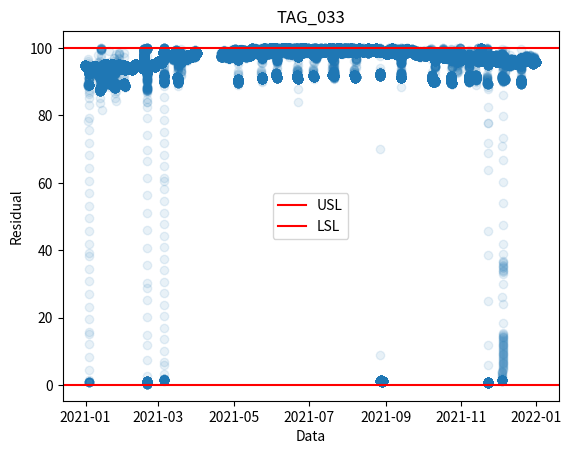

In [52]:
trend_chart('TAG_033')

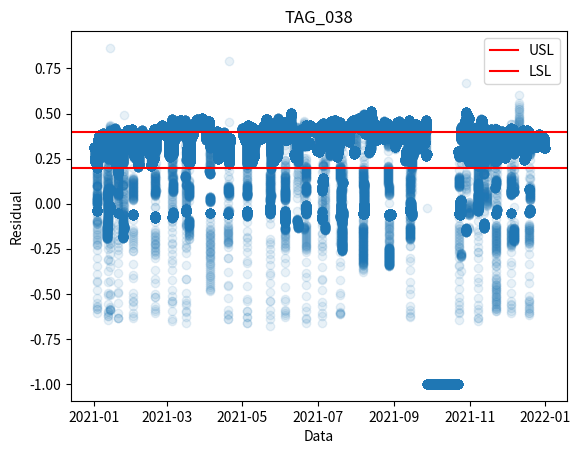

In [53]:
trend_chart('TAG_038')

In [ ]:
trend_chart('TAG_004')

In [ ]:
trend_chart('TAG_121')

In [ ]:
trend_chart('TAG_151')

In [ ]:
trend_chart('TAG_010')

In [ ]:
# 정상
normal = df_raw[df_raw['cause']=='정상']

# 불량중지
defect = df_raw[df_raw['cause']=='불량중지']

# 나머지 중지
other = copy.deepcopy(df_raw)
other.drop(other[other['cause']=='정상'].index, inplace=True)
other.drop(other[other['cause']=='불량중지'].index, inplace=True)

In [ ]:
# trend chart 함수

def trend_chart(data):
    fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(20,13))
    
    plt.subplot(1,3,1)
    plt.scatter(normal['datetime'], normal[data],alpha = 0.1)
    plt.title(data + ' 정상')
    plt.xlabel('Data') ; plt.ylabel('Residual')
#    plt.axhline(y=normal[data].mean(), linestyle="-", label='CL')
#    plt.axhline(y=normal[data].mean()+3*np.std(normal[data]), linestyle='--', color='red', label='UCL')
#    plt.axhline(y=normal[data].mean()-3*np.std(normal[data]), linestyle='--', color='red', label='LCL')
    plt.axhline(y=tag_list1[tag_list1['id'] == data].set_index("id").to_dict()['기준최소값'][data], linestyle='-', color='red', label='USL')
    plt.axhline(y=tag_list2[tag_list2['id'] == data].set_index("id").to_dict()['기준최대값'][data], linestyle='-', color='red', label='LSL')
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.scatter(defect['datetime'], defect[data], alpha = 0.1)
    plt.title(data + ' 불량중지')
    plt.xlabel('Data') ; plt.ylabel('Residual')
#    plt.axhline(y=defect[data].mean(), linestyle="-", label='CL')
#    plt.axhline(y=nomal[data].mean()+3*np.std(nomal[data]), linestyle='--', color='red', label='UCL')
#    plt.axhline(y=nomal[data].mean()-3*np.std(nomal[data]), linestyle='--', color='red', label='LCL')
    plt.axhline(y=tag_list1[tag_list1['id'] == data].set_index("id").to_dict()['기준최소값'][data], linestyle='-', color='red', label='USL')
    plt.axhline(y=tag_list2[tag_list2['id'] == data].set_index("id").to_dict()['기준최대값'][data], linestyle='-', color='red', label='LSL')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.scatter(other['datetime'], other[data], alpha = 0.1)
    plt.title(data + ' 나머지 중지')
    plt.xlabel('Data') ; plt.ylabel('Residual')
#    plt.axhline(y=other[data].mean(), linestyle="-", label='CL')
#    plt.axhline(y=nomal[data].mean()+3*np.std(nomal[data]), linestyle='--', color='red', label='UCL')
#    plt.axhline(y=nomal[data].mean()-3*np.std(nomal[data]), linestyle='--', color='red', label='LCL')
    plt.axhline(y=tag_list1[tag_list1['id'] == data].set_index("id").to_dict()['기준최소값'][data], linestyle='-', color='red', label='USL')
    plt.axhline(y=tag_list2[tag_list2['id'] == data].set_index("id").to_dict()['기준최대값'][data], linestyle='-', color='red', label='LSL')
    plt.legend()

In [ ]:
except_date = df_raw.drop(['datetime','cause'], axis=1)

for i in except_date:
    trend_chart(i)

stop_rate_2 =my_intervals.groupby('cause').agg(['count'])
stop_rate_2

stop_rate_2.plot.pie(y=('date', 'count'), autopct="%.1f%%",colors=['skyblue', 'pink'])
labels = ['기타중지', '불량중지']